<a href="https://colab.research.google.com/github/Chi36/Test2/blob/main/Frank_Test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load dataset and display first few rows

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('/content/SAF Dataset.xlsx')

# Display the first few rows
print(df.head())


       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   

      FC (%)    Cel (%)    Hem (%)    Lig (%) Location   \
0  13.045822  37.260000  14.620000  31.680000        US   
1  17.216438  31.300000  24.300000  14.100000        US   
2  17.684464  35.000000  27.500000  10.000000        US   
3   8.626970  35.000000  25.000000  26.500000        US   
4  16.030195  22.775726  55.419525   2.955145        US   

   Plant capacity (kg/hr)   MSP  
0                   25000  0.64  
1                   25000  0.63  
2                   25000  0.69  
3                   25000  0

Data overview

In [2]:
# Basic information about the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   C (%)                   186 non-null    float64
 1   H (%)                   186 non-null    float64
 2   N (%)                   186 non-null    float64
 3   O (%)                   186 non-null    float64
 4   S (%)                   186 non-null    float64
 5   VM (%)                  186 non-null    float64
 6   Ash (%)                 186 non-null    float64
 7   FC (%)                  186 non-null    float64
 8   Cel (%)                 186 non-null    float64
 9   Hem (%)                 186 non-null    float64
 10  Lig (%)                 186 non-null    float64
 11  Location                186 non-null    object 
 12  Plant capacity (kg/hr)  186 non-null    int64  
 13  MSP                     186 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory

Summary statistics

In [3]:
# Summary statistics
print(df.describe())

            C (%)       H (%)       N (%)       O (%)       S (%)      VM (%)  \
count  186.000000  186.000000  186.000000  186.000000  186.000000  186.000000   
mean    49.506202    6.418846    1.793219   42.060283    0.221450   75.465442   
std      4.002631    1.037071    1.949253    5.059810    0.392152    9.172079   
min     40.020000    5.320000    0.100000   27.360000    0.000000   49.357766   
25%     47.014626    5.980000    0.490884   39.366227    0.000000   71.700000   
50%     48.867116    6.174469    1.171271   43.280000    0.000000   76.555556   
75%     52.846674    6.500000    2.189781   45.557022    0.310034   81.797235   
max     60.460000   10.762332    8.210000   52.860000    1.552259   94.161220   

          Ash (%)      FC (%)     Cel (%)     Hem (%)     Lig (%)  \
count  186.000000  186.000000  186.000000  186.000000  186.000000   
mean     8.694476   15.840234   33.685306   26.992285   21.840139   
std      9.878574    6.382265    9.955842    9.737054   10.9847

Check for missing values

In [11]:
import pandas as pd

# Load your dataset into a DataFrame
df = pd.read_excel('/content/SAF Dataset.xlsx')

# Check for missing values
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing values per column:")
print(missing_values)

# Check if there are any missing values in the entire DataFrame
has_missing_values = df.isnull().any().any()
print("Has missing values:", has_missing_values)


Missing values per column:
C (%)                     0
H (%)                     0
N (%)                     0
O (%)                     0
S (%)                     0
VM (%)                    0
Ash (%)                   0
FC (%)                    0
Cel (%)                   0
Hem (%)                   0
Lig (%)                   0
Location                  0
Plant capacity (kg/hr)    0
MSP                       0
dtype: int64
Has missing values: False


Check for outliers

In [6]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Function to visualize outliers
def visualize_outliers(df, column):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

Box plot for each variable

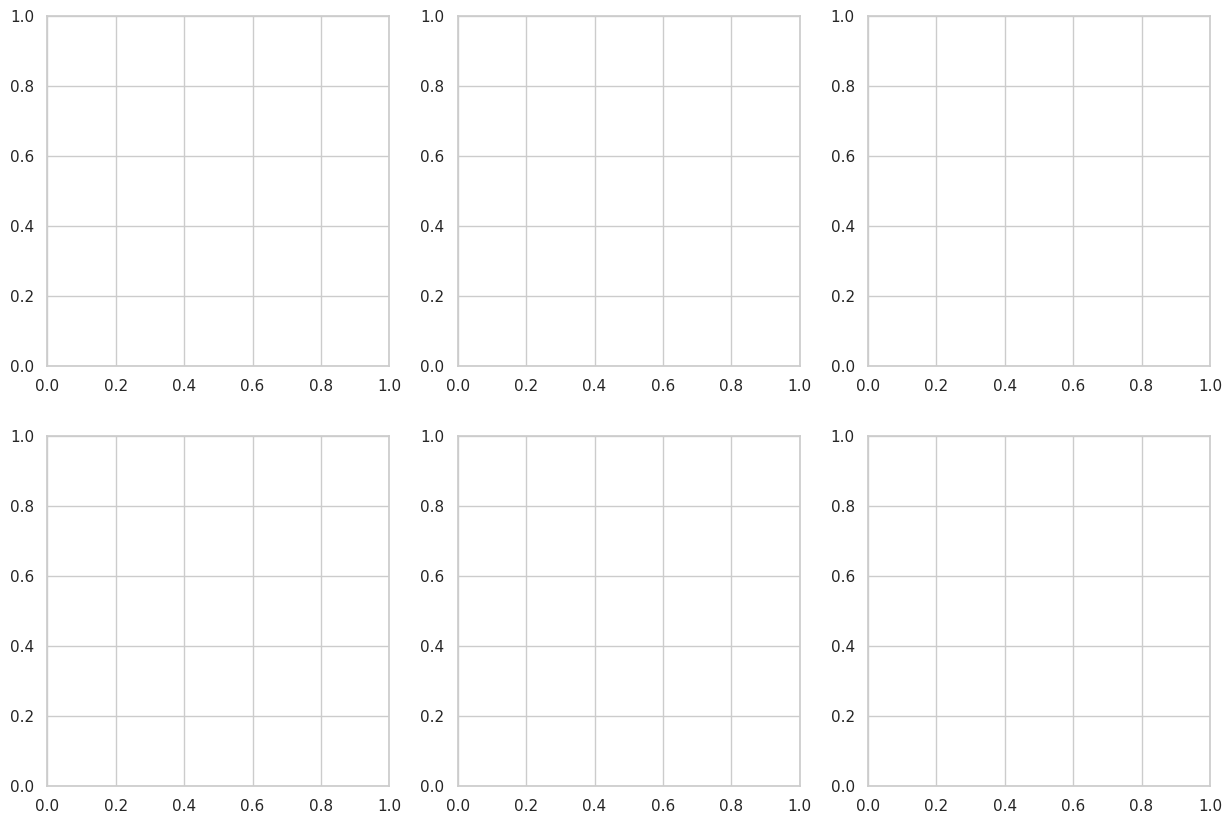

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with columns 'feed_type', 'C', 'H', 'N', 'S', 'O', 'ASH'

# Box plots to show distribution of chemical components by feed type
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

Check for categorical varibles

In [29]:
# Get the data types of each column
data_types = df.dtypes

# Print the data types
print(data_types)

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nNumeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)

C (%)                     float64
H (%)                     float64
N (%)                     float64
O (%)                     float64
S (%)                     float64
VM (%)                    float64
Ash (%)                   float64
FC (%)                    float64
Cel (%)                   float64
Hem (%)                   float64
Lig (%)                   float64
Location                   object
Plant capacity (kg/hr)      int64
MSP                       float64
dtype: object

Numeric columns: Index(['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)',
       'FC (%)', 'Cel (%)', 'Hem (%)', 'Lig (%)', 'Plant capacity (kg/hr)',
       'MSP'],
      dtype='object')

Categorical columns: Index(['Location '], dtype='object')


Histogram

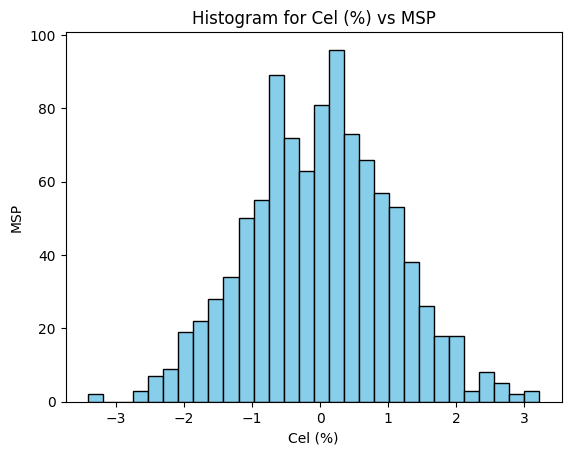

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for the histogram
data = np.random.randn(1000)
# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_excel('/content/SAF Dataset.xlsx')

# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Cel (%)')
plt.ylabel('MSP')
plt.title('Histogram for Cel (%) vs MSP')

# Display the plot
plt.show()

Heatmaps (remove categorical variables before printing heatmaps)


Numerical DataFrame (Categorical Variables Removed):
       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   

      FC (%)    Cel (%)    Hem (%)    Lig (%)  Plant capacity (kg/hr)   MSP  
0  13.045822  37.260000  14.620000  31.680000                   25000  0.64  
1  17.216438  31.300000  24.300000  14.100000                   25000  0.63  
2  17.684464  35.000000  27.500000  10.000000                   25000  0.69  
3   8.626970  35.000000  25.000000  26.500000                   25000  0.85  
4  16.030195  22.775726  55.419525   2.955145                   25000  1.20

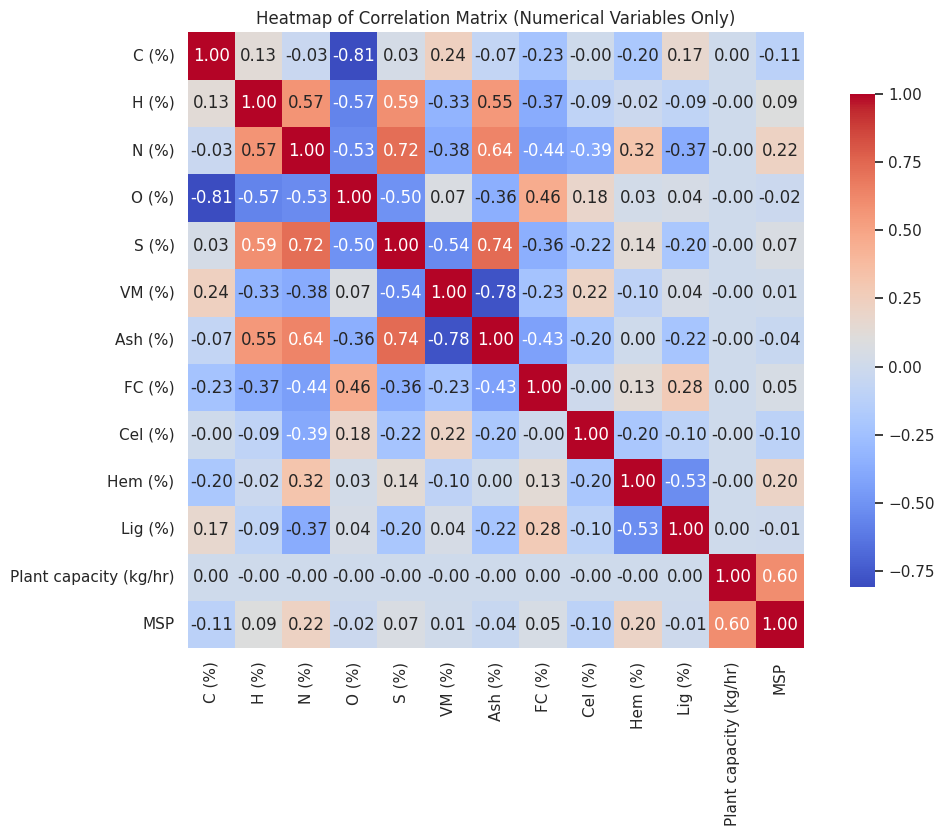

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_excel('/content/SAF Dataset.xlsx')  # Change to your dataset path

# Remove categorical variables
data_numerical = df.select_dtypes(include=['float64', 'int64'])

# Display the numerical DataFrame
print("\nNumerical DataFrame (Categorical Variables Removed):")
print(data_numerical.head())

# Calculate the correlation matrix
correlation_matrix = data_numerical.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,            # Annotate cells with correlation coefficients
    fmt=".2f",            # Format for the annotation
    cmap='coolwarm',      # Color map for the heatmap
    square=True,          # Make cells square-shaped
    cbar_kws={"shrink": .8}  # Adjust color bar size
)

plt.title('Heatmap of Correlation Matrix (Numerical Variables Only)')
plt.show()


Splitting dataset into features and targets

In [16]:
import pandas as pd

# Load your data (replace 'your_data.csv' with your actual file path)
df = pd.read_excel('/content/SAF Dataset.xlsx')

# Assuming 'target_variable' is the column you want to predict
target_variable = 'MSP'

# Split the data into features (X) and target variable (y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

print("Features (X):")
print(X.head())

print("Target Variable (y):")
print(y.head())

Features (X):
       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   

      FC (%)    Cel (%)    Hem (%)    Lig (%) Location   \
0  13.045822  37.260000  14.620000  31.680000        US   
1  17.216438  31.300000  24.300000  14.100000        US   
2  17.684464  35.000000  27.500000  10.000000        US   
3   8.626970  35.000000  25.000000  26.500000        US   
4  16.030195  22.775726  55.419525   2.955145        US   

   Plant capacity (kg/hr)  
0                   25000  
1                   25000  
2                   25000  
3                   25000  
4         

The MSP has a strong direct correlation with the C(%)